In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=1)

In [2]:
import pylab as plt
def plot(X, y, preds, scores, score):
    size=8
    cmap = 'rainbow'

    print('embedding score: %.2f'%score)
    from sklearn.metrics import adjusted_rand_score
    print('ari: %.2f'%adjusted_rand_score(y,preds))
    plt.figure(figsize=(2 * size, size))
    
    plt.subplot(121)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], c=scores, cmap='Greys', s=95, edgecolors='none')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.55, c=preds, cmap=cmap, s=30, edgecolors='none')
    plt.title('%d predicted classes'%len(set(preds)))
    
    plt.subplot(122)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7, s=30, edgecolors='black')
    plt.title('%d true classes'%len(set(y)))
    plt.show()
    
    
from eden.iterated_semisupervised_feature_selection import semisupervised_target
from eden.embedder import Embedder
import random
import time
def embed2d(X, y, n=2, n_iter=5, known_fraction=0.05, random_state=1):
    for i in range(1,n+1):
        print('%d/%d'%(i,n))
        if known_fraction == 0:
            target = None
        else:
            target=semisupervised_target(target=y,known_fraction=known_fraction)
        print 'n_classes:',len(set(target))
        em = Embedder(n_iter=n_iter, random_state=random_state*time.time())
        preds = em.predict(X, target)
        score = em.score
        scores = em.scores
        Xlow = em.data_matrix
        plot(Xlow, y, preds, scores, score)

In [3]:
from eden.embedding import embed, embedding_quality, display_embedding
import numpy as np

In [4]:
n=1
n_iter=40
known_fraction=.15

Embedding quality [adjusted Rand index]: 0.64    data: (150, 4)   #classes: 3


/Library/Python/2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn("".join(errors),RuntimeWarning)


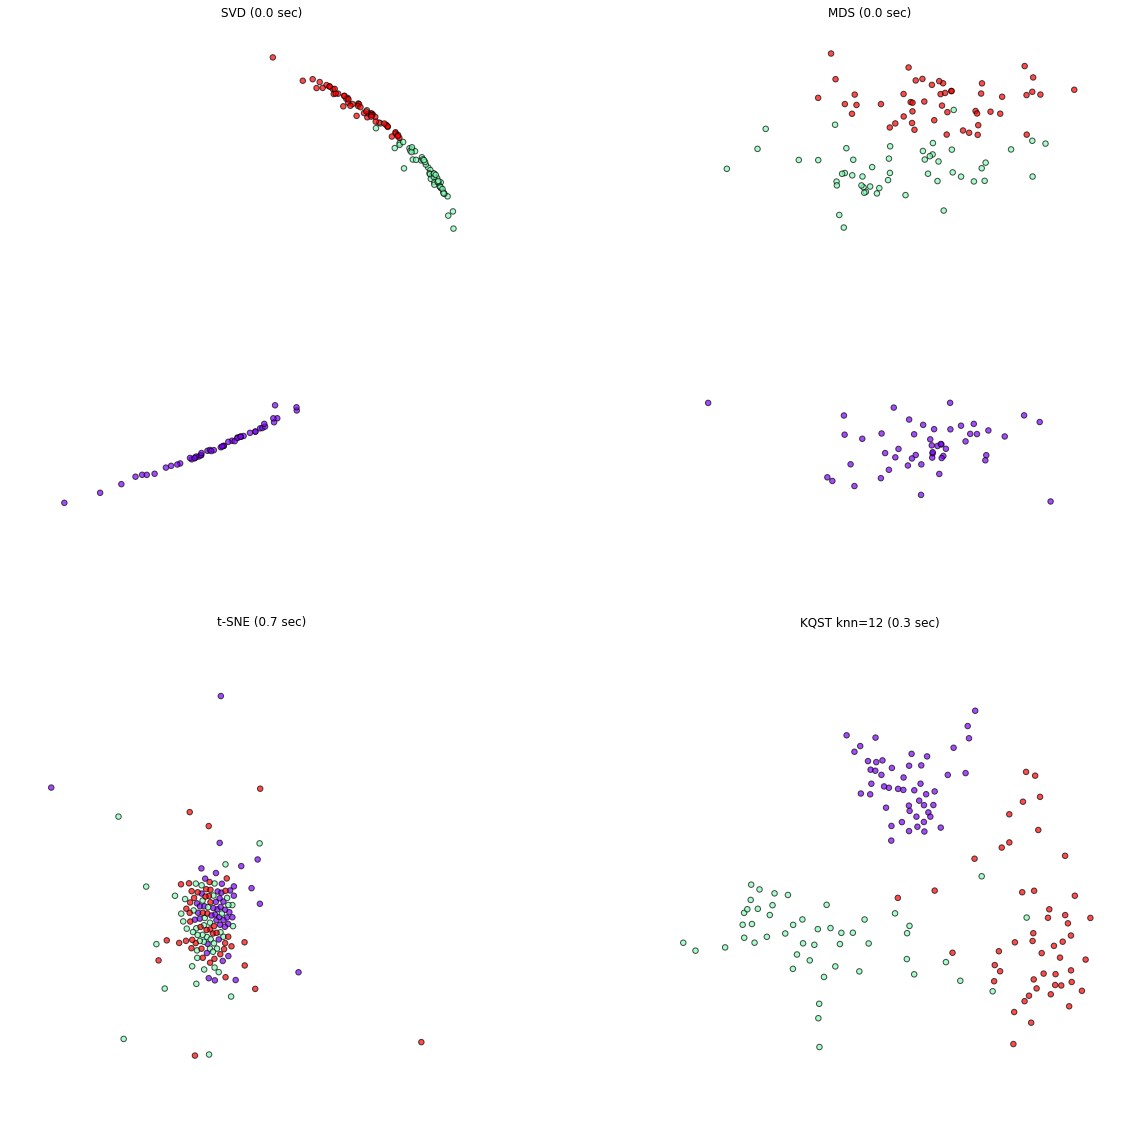

1/1
n_classes: 4
Input data matrix: 150 rows  4 cols
Feature selection
Data matrix: 150 rows  4 cols
embedding score: 0.54
ari: 0.87


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/costa/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/cluster/unsupervised.py:159: RuntimeWarning: invalid value encountered in maximum
  sil_samples = (B - A) / np.maximum(A, B)


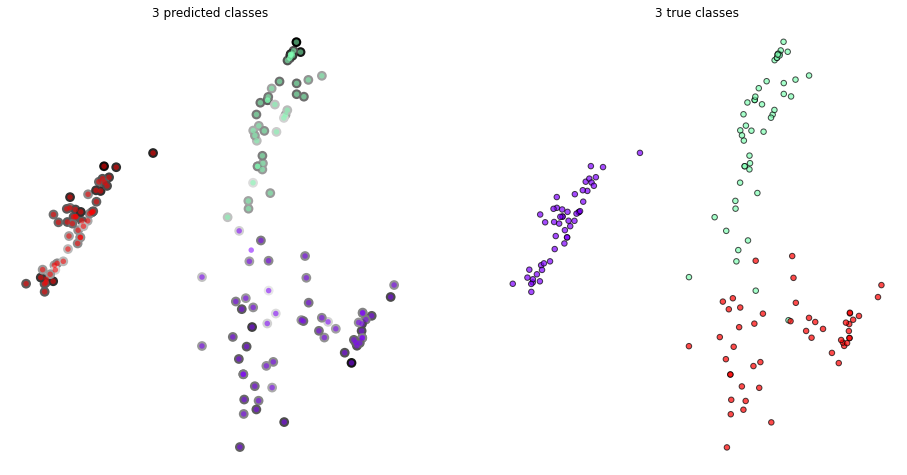

CPU times: user 27 s, sys: 474 ms, total: 27.5 s
Wall time: 41.1 s


In [ ]:
%%time
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
labels = iris.target
from sklearn.preprocessing import normalize,scale
X = normalize(X)
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 12, 'k_threshold': 0.8, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

Embedding quality [adjusted Rand index]: 0.97    data: (400, 10)   #classes: 8


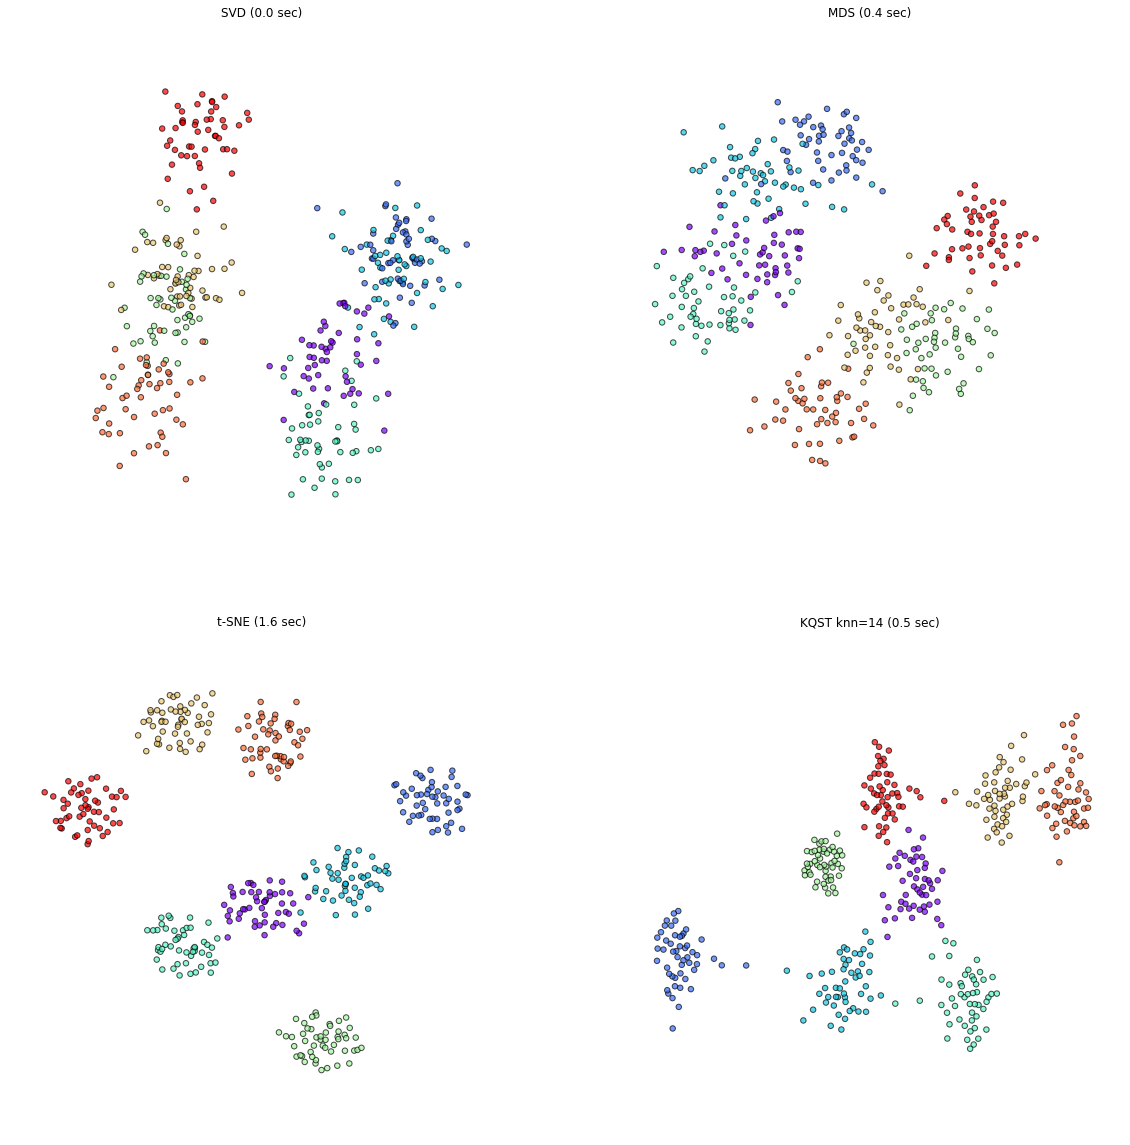

1/1
n_classes: 9
Input data matrix: 400 rows  10 cols
Feature selection
Data matrix: 400 rows  9 cols


In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=400, centers=8, n_features=10, cluster_std=3, random_state=0)

opts={'knn': 14, 'k_threshold': 0.9, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
from eden.util import read
M=[]
labels=[]
for line in read(uri):
    line = line.strip()
    if line:
        items = line.split(',')
        label = int(items[0])
        labels.append(label)
        data = [float(x) for x in items[1:]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = scale(np.array(M))
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 7, 'k_threshold': 0.9, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(',')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = (np.array(M))
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 12, 'k_threshold': 0.90, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(',')
        label = int(items[-1])//7
        labels.append(label)
        data = [float(x) for x in items[1:-1]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
#X = scale(np.array(M))
X = np.array(M)
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 15,  'k_threshold': 0.98, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(',')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = (np.array(M))
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 17, 'k_threshold': 0.97, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(';')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

import numpy as np
from sklearn.preprocessing import normalize,scale
X = (np.array(M))
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 12, 'k_threshold': 0.90, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00230/plrx.txt'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split('\t')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

import numpy as np
from sklearn.preprocessing import normalize,scale
X = normalize(np.array(M))
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 100, 'k_threshold': 0.5, 'gamma': 1e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time 
%matplotlib inline
import numpy as np

n_max = 500

def load_data(uri):
    from eden.util import read
    M=[]
    labels=[]
    counter = 0
    for line in read(uri):
        counter += 1
        if counter > n_max:
            break
        line = line.strip()
        if line:
            items = line.split(' ')
            label = hash(items[-1])&13
            labels.append(label)
            data = [float(x) for x in items[:-1]]
            M.append(data)
    X = np.array(M)
    y=np.array(labels)
    return X,y

for i,c in enumerate('abcdefghi'):
    uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xa%s.dat'%c
    X_,y_ = load_data(uri)
    if i==0:
        X=X_
        y=y_
    else:
        X=np.vstack((X,X_))
        y=np.hstack((y,y_))

opts={'knn': 150, 'k_threshold': 0.85, 'gamma': 1e-4}
low_dim = 5
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts, low_dim=low_dim), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time
%matplotlib inline
#breast-cancer-wisconsin
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
from eden.util import read
M=[]
labels=[]
for line in read(uri):
    line = line.strip()
    if line:
        items = line.split(',')
        label = str(items[1])
        labels.append(label)
        data = [float(x) for x in items[2:]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = scale(np.array(M))
from sklearn.preprocessing import LabelEncoder
targets = LabelEncoder().fit_transform(labels)
y=np.array(targets)

opts={'knn': 12, 'k_threshold': 0.75, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time
%matplotlib inline
from sklearn import datasets
digits = datasets.load_digits(n_class=7)
X = digits.data
y = digits.target
from sklearn.preprocessing import normalize,scale
X = normalize(X)

opts={'knn': 16, 'k_threshold': 0.9, 'gamma': 1e-4}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
%%time
%matplotlib inline

from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
n_max=300
pos_graphs = islice(gspan_to_eden('http://www.bioinf.uni-freiburg.de/~costa/bursi_pos_train.gspan'),n_max)
neg_graphs = islice(gspan_to_eden('http://www.bioinf.uni-freiburg.de/~costa/bursi_neg_train.gspan'),n_max)

from eden.graph import Vectorizer
vectorizer = Vectorizer(complexity=3, nbits=17)

import numpy as np
from scipy.sparse import vstack
Xpos = vectorizer.transform(pos_graphs)
Xneg = vectorizer.transform(neg_graphs)
yp = [1] * Xpos.shape[0]
yn = [0] * Xneg.shape[0]
y = np.array(yp + yn)
X = vstack([Xpos, Xneg], format="csr")

opts={'knn': 10, 'k_threshold': 0.95, 'gamma': 1e-3}
low_dim = 200
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts, low_dim=low_dim), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

In [ ]:
def rfam_uri(family_id):
        return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

def rfam_to_matrix(rfam_id, n_max=50, complexity=2):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    from itertools import islice
    seqs = islice(seqs,n_max)
    rs = int(time.time())
    from eden.RNA import Vectorizer
    rnavec=Vectorizer(complexity=complexity, n_neighbors=30, sampling_prob=.1, n_iter=40, random_state=rs)
    X = rnavec.fit_transform(seqs)
    return X

def rfam_data(rfam_ids, n_max=100, complexity=2):
    import numpy as np
    from scipy.sparse import vstack
    for i,rfam_id in enumerate(rfam_ids):
        X_=rfam_to_matrix(rfam_id, n_max=n_max, complexity=complexity)
        y_ = [i] * X_.shape[0]
        if i==0:
            X=X_
            y=y_
        else:
            X = vstack([X, X_], format="csr")
            y=y+y_
    y = np.array(y)
    return X,y

rfam_ids=['RF00004','RF00005','RF00015','RF00020','RF00026','RF00169',
          'RF00380','RF00386','RF01051','RF01055','RF01234','RF01699',
          'RF01701','RF01705','RF01731','RF01734','RF01745','RF01750',
          'RF01942','RF01998','RF02005','RF02012','RF02034']

X,y = rfam_data(rfam_ids[0:7],n_max=400, complexity=3)

opts={'knn': 5, 'k_threshold': 0.97, 'gamma': 1e-3}
low_dim = 200
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts, low_dim=low_dim), X.shape, len(set(y)))
display_embedding(X,y, opts)

embed2d(X, y, n=n, n_iter=n_iter, known_fraction=known_fraction)

--------